In [1]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:<password>@localhost/EmployeeSQL')
connection = engine.connect()


In [12]:
import pandas as pd

employees = pd.read_sql('Select * from employees', connection)
departments = pd.read_sql('Select * from departments', connection)
titles = pd.read_sql('select * from titles', connection)
dept_manager = pd.read_sql('select * from dept_manager', connection)
dept_emp = pd.read_sql('select * from dept_emp', connection)
salaries = pd.read_sql('select * from salaries', connection)


In [13]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [14]:
departments.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [37]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [16]:
dept_manager.head()

,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,9999-01-01
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,9999-01-01
4,d003,110183,1985-01-01,1992-03-21


In [17]:
dept_emp.head()

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [18]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [31]:
titles_group = titles.groupby(['title'])

titles_group

In [59]:
df = titles.merge(salaries, on = 'emp_no')
avg_sal = df.groupby('title')['salary'].mean()

avg_sal

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

In [68]:
df2 = df['salary']
df2

0         60117
1         65828
2         40006
3         40054
4         40054
          ...  
443303    49597
443304    49597
443305    40000
443306    40000
443307    63707
Name: salary, Length: 443308, dtype: int64

Text(0.5, 0, 'Salary Ranges')

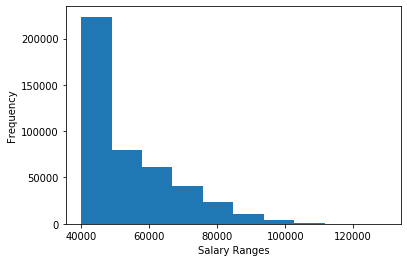

In [70]:
import matplotlib.pyplot as plt
sal_range = df2.plot.hist()
plt.xlabel('Salary Ranges')

Text(0.5, 0, 'Job Titles')

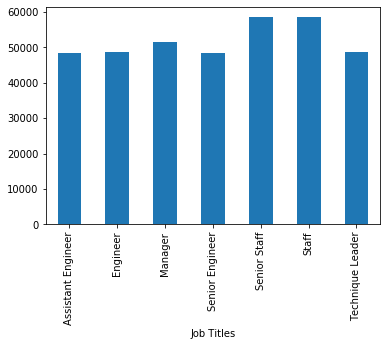

In [77]:
avg_sal.plot.bar()
plt.xlabel('Job Titles')